In [6]:
import numpy as np

x = np.array(10) # a scalar tensor or a 0d tensor
x

array(10)

In [7]:
x.ndim

0

In [8]:
# Vectors (rank-1 tensors)
x = np.array([1, 2, 43, 20, 8]) # 5D vector, not a 5D tensor!
x

array([ 1,  2, 43, 20,  8])

In [9]:
x.ndim

1

In [10]:
# Matrices (rank-2 tensors)
x = np.array([[1, 2, 3, 4, 5],
             [6, 7, 8, 9, 10],
             [11, 12, 13, 14, 15]])
x.ndim

2

In [11]:
# Rank-3 tensors
x = np.array([[[1, 2, 3, 4, 5],
             [6, 7, 8, 9, 10],
             [11, 12, 13, 14, 15]],
              [[1, 2, 3, 4, 5],
             [6, 7, 8, 9, 10],
             [11, 12, 13, 14, 15]],
              [[1, 2, 3, 4, 5],
             [6, 7, 8, 9, 10],
             [11, 12, 13, 14, 15]]])
x.ndim

3

In [12]:
from tensorflow.keras.datasets import mnist

In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
train_images.dtype

dtype('uint8')

In [16]:
import matplotlib.pyplot as plt

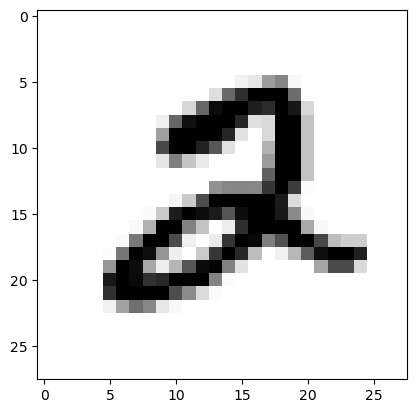

In [17]:
digit = train_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [18]:
train_labels[5]

2

### 2.2.6 Manipulating tensors in NumPy

In [20]:
# Slicing
my_slice = train_images[10:100] # = train_images[10:100, :, :] = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [21]:
# 14 x 14 pixels in the bottom-right corner of all images
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [22]:
# Crop the image to patches of 14 x 14 pixels centered in the middle:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

In [23]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j], 0)
    return x

def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,j]
    return x

In [24]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))
    

Took: 0.01 s
Took: 0.81 s


In [25]:
pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-pro

In [26]:
x

array([[5.92417097e-01, 3.01319790e-01, 7.39837589e-01, ...,
        1.57790008e-01, 6.74457565e-01, 7.24019050e-04],
       [2.68358509e-01, 7.73265917e-01, 3.97307614e-01, ...,
        7.61731682e-01, 1.91332434e-01, 4.08985652e-01],
       [7.89905777e-01, 1.52869406e-01, 1.44370440e-01, ...,
        4.71924154e-01, 5.33769687e-01, 5.95446859e-01],
       ...,
       [6.82473714e-01, 4.89599413e-01, 5.53913425e-01, ...,
        9.70499478e-01, 6.40091744e-01, 8.29869692e-02],
       [4.57326992e-01, 5.80615375e-01, 1.90918391e-01, ...,
        4.35846141e-02, 8.06820099e-01, 3.52797582e-01],
       [2.25250798e-02, 9.68987368e-01, 3.91206792e-01, ...,
        9.29293240e-01, 3.92209447e-01, 3.52638406e-02]])

In [48]:
x.ndim

2

In [52]:
print(x.shape)
print(x.ndim)

(20, 100)
2


In [70]:
x = np.array([1, 2, 3, 4])
x.shape

(4,)

### 2.3.3 Tensor Product

In [73]:
# Dot product of 2 vectors
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
        
    return z

x = np.random.random((4,))
y = np.random.random((4,))
z = np.dot(x, y)

print(naive_vector_dot(x, y))
print(z)

2.3502335838907973
2.3502335838907973


In [87]:
# Matrix-Vector product

def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]

    return z
    
# Another way using the previous function
def naive_matrix_vector_dot_2(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)

    return z

x = np.random.randint(0, 11, size=(3, 2)) # produces a matrix of 3 x 2 with values between 0 and 10
y = np.random.randint(0, 11, size=(2,))
print(x)
print(y)
print("-----------")
print(naive_matrix_vector_dot(x, y))
print(naive_matrix_vector_dot_2(x,y))

[[9 7]
 [5 5]
 [7 1]]
[5 4]
-----------
[73. 45. 39.]
[73. 45. 39.]


In [95]:
# Matrix-Matrix product

def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            col_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, col_y)
    return z

x = np.random.randint(0, 11, size=(3,2))
y = np.random.randint(0, 11, size=(2,3))
z = np.dot(x, y)

print(naive_matrix_dot(x, y))
print(z)

[[120.  92.  48.]
 [ 20.  14.  12.]
 [ 50.  35.  30.]]
[[120  92  48]
 [ 20  14  12]
 [ 50  35  30]]


### 2.3.4 Tensor reshaping

In [116]:
x = np.array([[1, 2, 3],
              [4, 5, 6]])
print(x)
x.shape
x = x.reshape((3, 2))
print(x)
print(x.shape)

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]
(3, 2)


In [120]:
# Transposing: a special case of reshaping
x = np.zeros((4, 3))
print(x.shape)
x = np.transpose(x)
print(x.shape)

(4, 3)
(3, 4)
